<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller Transformaciones - Filtros</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Prof. Flavio Prieto</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: faprietoo@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRONICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="fig/Escudo_UN.png",width=100,height=100>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>1 de septiembre de 2022</p>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.image as mpimg

from scipy.signal import convolve2d as conv2

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Transformaciones Geométricas</h1>

<h1>Función: <span style="color:blue">cv2.resize</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#resize

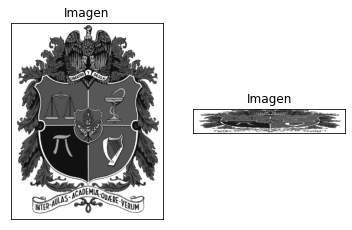

In [2]:
#cv.Resize

img = cv2.imread('fig/Notebook/Escudo_UN.png',0) # Carga imagen en color
#img2 = np.zeros((100,400))
#cv.Resize(img,img2,interpolation = cv2.INTER_LINEAR)
height, width = img.shape
img2 = cv2.resize(img, (2*width, height//4), interpolation = cv2.INTER_CUBIC)




plt.figure(1)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2, cmap='gray')
plt.title('Imagen'), plt.xticks([]), plt.yticks([])
plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Espacios de Color</h1>

<h1>Función: <span style="color:blue">cv2.cvtColor</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?#highlight=cvcvtcolor#void%20cvCvtColor(const%20CvArr*%20src,%20CvArr*%20dst,%20int%20code)

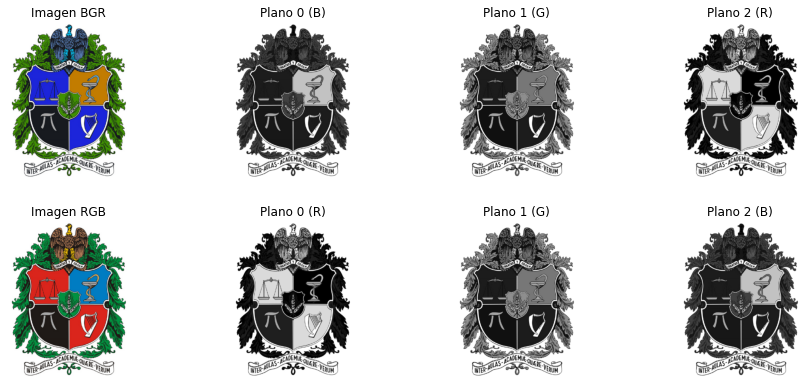

In [33]:
#Conversion BGR to RGB
img = cv2.imread('fig/Notebook/Escudo_UN.png',1) # Carga imagen en color
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplots_adjust(top=1.25,bottom=0.01,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(241), plt.imshow(img), plt.title('Imagen BGR'), plt.axis("off")
plt.subplot(242), plt.imshow(img[:,:,0], cmap='gray'), plt.title('Plano 0 (B)'),plt.axis("off")
plt.subplot(243), plt.imshow(img[:,:,1], cmap='gray'), plt.title('Plano 1 (G)'),plt.axis("off")
plt.subplot(244), plt.imshow(img[:,:,2], cmap='gray'), plt.title('Plano 2 (R)'),plt.axis("off")
plt.subplot(245), plt.imshow(img2), plt.title('Imagen RGB'), plt.axis("off")
plt.subplot(246), plt.imshow(img2[:,:,0], cmap='gray'), plt.title('Plano 0 (R)'),plt.axis("off")
plt.subplot(247), plt.imshow(img2[:,:,1], cmap='gray'), plt.title('Plano 1 (G)'),plt.axis("off")
plt.subplot(248), plt.imshow(img2[:,:,2], cmap='gray'), plt.title('Plano 2 (B)'),plt.axis("off")

plt.show()

#OpenCV reads image in BGR but plots it in RGB format

In [4]:
#cv2.cvtColor(input_image, flag) 
#where flag determines the type of conversion.

#There are more than 150 color-space conversion methods 
#     available in OpenCV.

import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print (flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [5]:
#cv2.cvtColor(input_image, flag) 
#where flag determines the type of conversion.

#There are more than 150 color-space conversion methods 
#     available in OpenCV.

import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_R')]
print (flags)

['COLOR_RGB2BGR', 'COLOR_RGB2BGR555', 'COLOR_RGB2BGR565', 'COLOR_RGB2BGRA', 'COLOR_RGB2GRAY', 'COLOR_RGB2HLS', 'COLOR_RGB2HLS_FULL', 'COLOR_RGB2HSV', 'COLOR_RGB2HSV_FULL', 'COLOR_RGB2LAB', 'COLOR_RGB2LUV', 'COLOR_RGB2Lab', 'COLOR_RGB2Luv', 'COLOR_RGB2RGBA', 'COLOR_RGB2XYZ', 'COLOR_RGB2YCR_CB', 'COLOR_RGB2YCrCb', 'COLOR_RGB2YUV', 'COLOR_RGB2YUV_I420', 'COLOR_RGB2YUV_IYUV', 'COLOR_RGB2YUV_YV12', 'COLOR_RGBA2BGR', 'COLOR_RGBA2BGR555', 'COLOR_RGBA2BGR565', 'COLOR_RGBA2BGRA', 'COLOR_RGBA2GRAY', 'COLOR_RGBA2M_RGBA', 'COLOR_RGBA2RGB', 'COLOR_RGBA2YUV_I420', 'COLOR_RGBA2YUV_IYUV', 'COLOR_RGBA2YUV_YV12', 'COLOR_RGBA2mRGBA']


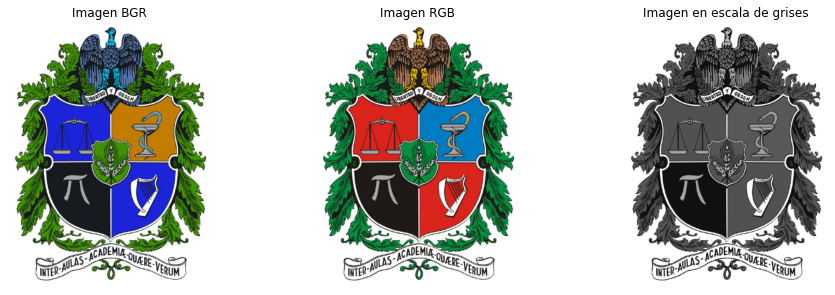

In [26]:
#Conversion BGR to RGB
img = cv2.imread('fig/Notebook/Escudo_UN.png',1) # Carga imagen en color
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

plt.figure(1)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Imagen BGR'), plt.axis("off")
plt.subplot(132), plt.imshow(img1, cmap='gray'), plt.title('Imagen RGB'), plt.axis("off")
plt.subplot(133), plt.imshow(img2, cmap='gray'), plt.title('Imagen en escala de grises'), plt.axis("off")
plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Umbralización</h1>

<h1>Función: <span style="color:blue">cv2.threshold</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=cvthres#double%20cvThreshold(const%20CvArr*%20src,%20CvArr*%20dst,%20double%20threshold,%20double%20max_value,%20int%20threshold_type)

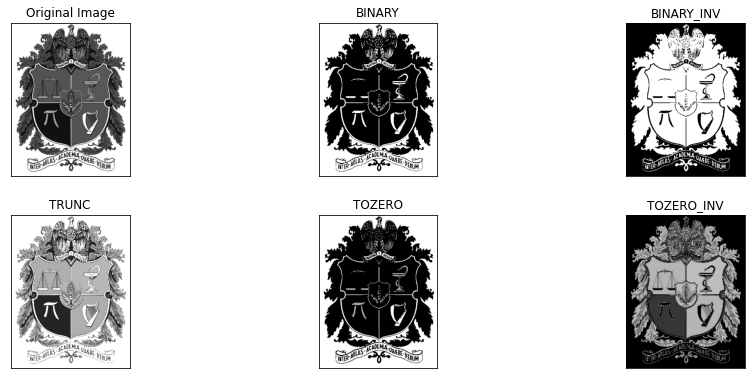

In [37]:
 #cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst

img = cv2.imread('fig/Notebook/Escudo_UN.png',0) 

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)



titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.subplots_adjust(top=1.5,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



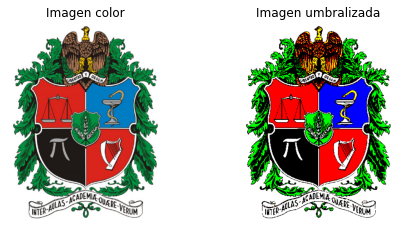

In [38]:
 #cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst

img = cv2.imread('fig/Notebook/Escudo_UN.png',1) # Carga imagen en color
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

plt.figure(1)
plt.subplots_adjust(top=3,bottom=0.3,left=0.10,right=1,hspace=0.25,wspace=0.5)
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Imagen color'), plt.axis("off")
plt.subplot(222), plt.imshow(thresh1, cmap='gray'), plt.title('Imagen umbralizada'), plt.axis("off")
plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Umbral Adaptativo</h1>

<h1>Función: <span style="color:blue">cv2.threshold</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold
    

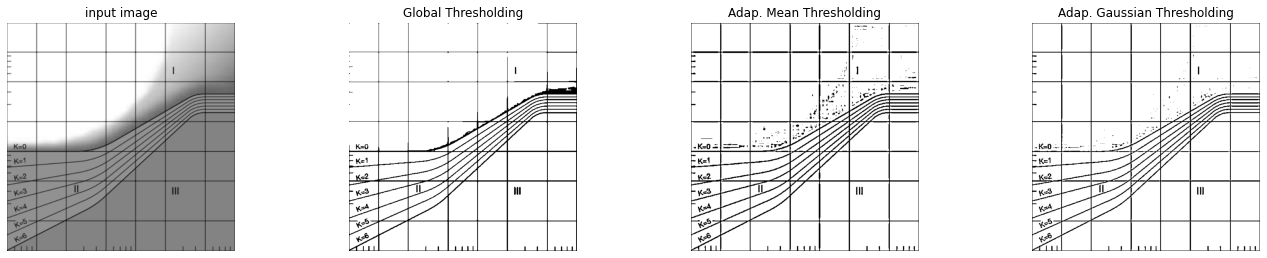

In [54]:
#cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst

img = cv2.imread('fig/Notebook/shadow.png',0)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=3,hspace=0.25,wspace=0.5)

plt.subplot(141),plt.imshow(img,'gray')
plt.title('input image'), plt.axis("off")
plt.subplot(142),plt.imshow(th1,'gray')
plt.title('Global Thresholding'), plt.axis("off")
plt.subplot(143),plt.imshow(th2,'gray')
plt.title('Adap. Mean Thresholding'), plt.axis("off")
plt.subplot(144),plt.imshow(th3,'gray')
plt.title('Adap. Gaussian Thresholding'), plt.axis("off")
 
plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Filtros lineales</h1>

<h1>Función: <span style="color:blue">cv2.filter2D</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=smooth#bilateralfilter

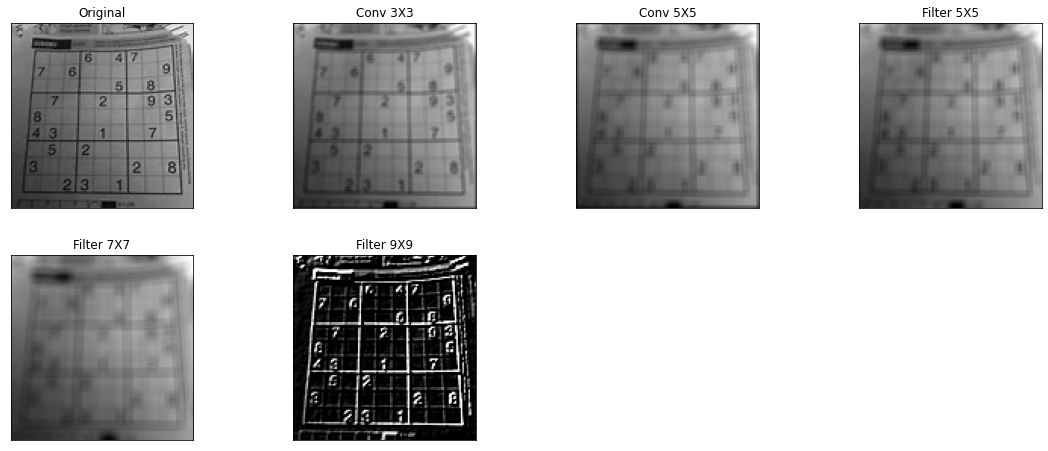

In [132]:
img = cv2.imread('fig/Notebook/Sudoku.jpg',0)

#Promedio
kernel1 = np.ones((3, 3)) / 9
kernel2 = np.ones((5, 5)) / 25
kernel3 = np.ones((7, 7)) / 49
kernel4 = np.asarray([[2,2,0],[2,0,-2],[0,-2,-2]])
kernel5 = np.asarray([[1,1,5],[1,5,2],[5,2,2]])/24

#Convolución
imgC1 = conv2(img, kernel1, 'same')
imgC2 = conv2(img, kernel2, 'same')
imgF2 = cv2.filter2D(img,-1,kernel2)
imgF3 = cv2.filter2D(img,-1,kernel3)
imgF4 = cv2.filter2D(img,-1,kernel4)

#imgC3 = conv2(img, kernel3, 'same')
#imgC4 = conv2(img, kernel4, 'same')
#imgC5 = conv2(img, kernel5, 'same')

#Visualización
# print(imgC2==imgF2)

plt.figure(1)
plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2.5,hspace=0.25,wspace=0.5)

plt.subplot(241),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(imgC1,cmap = 'gray')
plt.title('Conv 3X3'), plt.xticks([]), plt.yticks([])

plt.subplot(243),plt.imshow(imgC2,cmap = 'gray')
plt.title('Conv 5X5'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(imgF2,cmap = 'gray')
plt.title('Filter 5X5'), plt.xticks([]), plt.yticks([])

plt.subplot(245),plt.imshow(imgF3,cmap = 'gray')
plt.title('Filter 7X7'), plt.xticks([]), plt.yticks([])
plt.subplot(246),plt.imshow(imgF4,cmap = 'gray')
plt.title('Filter 9X9'), plt.xticks([]), plt.yticks([])

plt.show()

<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Filtros de suavizado</h1>

<h1>Función: <span style="color:blue">cv2.blur</span></h1>

<h1>Función: <span style="color:blue">cv2.medianBlur</span></h1>

<h1>Función: <span style="color:blue">cv2.GaussianBlur</span></h1>

<h1>Función: <span style="color:blue">cv2.bilateralFilter</span></h1>

#http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=smooth#bilateralfilter

In [51]:
def showSmoothings(img):
    
    #Blur: You can change the kernel size as you want
    sal1 = cv2.blur(img,(5,5)) 

    #Median
    sal2 = cv2.medianBlur(img,5)

    #Gaussian
    sal3 = cv2.GaussianBlur(img,(5,5), 0)

    #Bilateral
    sal4 = cv2.bilateralFilter(img,9,75,75)

    #Visualization
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.01,wspace=0.5)

    plt.subplot(231),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(sal1,cmap = 'gray')
    plt.title('Blur'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(sal2,cmap = 'gray')
    plt.title('Median'), plt.xticks([]), plt.yticks([])

    plt.figure(2)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.01,wspace=0.5)

    plt.subplot(234),plt.imshow(sal3,cmap = 'gray')
    plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
    plt.subplot(235),plt.imshow(sal4,cmap = 'gray')
    plt.title('Bilateral'), plt.xticks([]), plt.yticks([])

    plt.show()

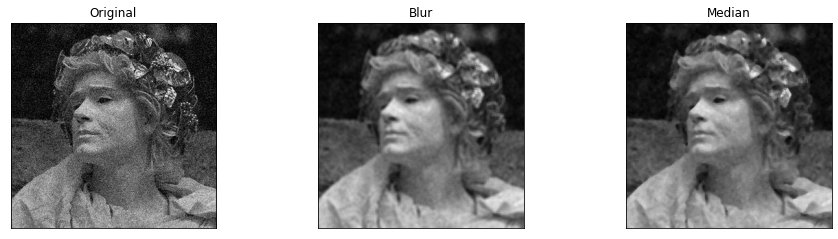

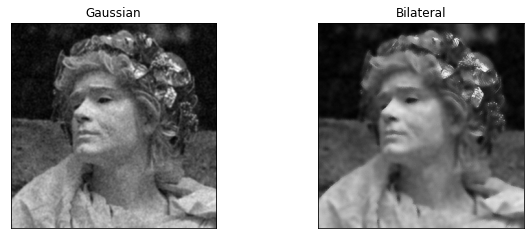

In [52]:
img = cv2.imread('fig/Notebook/noisy.jpg',0)

showSmoothings(img)

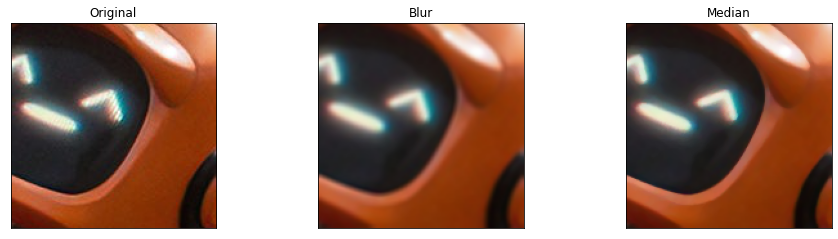

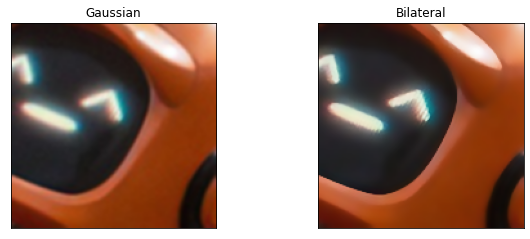

In [53]:
img = cv2.imread('fig/Notebook/robot.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)[100:260,640:800]

showSmoothings(img)

In [43]:
print(img.shape)

(720, 1280, 3)


<h1 style="font-size:250%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 80px;">
Filtros de realce (derivativos)</h1>

<h1>Función: <span style="color:blue">cv2.Sobel</span></h1> 

In [138]:
def getSobel(img):
    
    #Sobel: cv2.Sobel(src, ddepth, dx, dy, ksize)
    sobelx = abs(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3))
    sobely = abs(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3))

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(sobelx,cmap = 'gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

    plt.figure(2)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(1,2,1),plt.imshow(sobely,cmap = 'gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(sobelx+sobely,cmap = 'gray')
    plt.title('Sobel'), plt.xticks([]), plt.yticks([])
    plt.show()

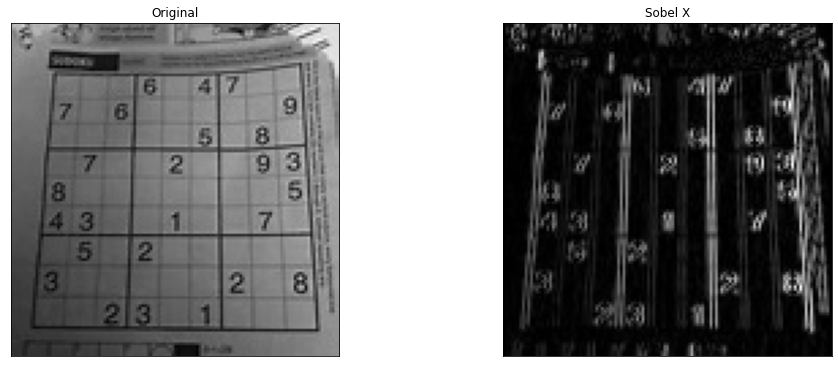

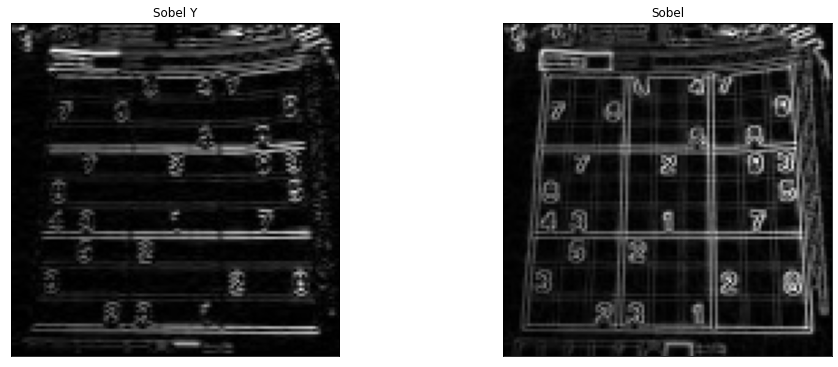

In [139]:
img = cv2.imread('fig/Notebook/Sudoku.jpg',0)

getSobel(img)

<h1>Función: <span style="color:blue">cv2.Laplacian</span></h1>

In [135]:
def getLaplacians(img):
    
    imgblur = cv2.medianBlur(img,3)
    
    #cv2.Laplacian(src, ddepth)
    laplacian = abs(cv2.Laplacian(img,cv2.CV_64F,ksize=1))
    laplacian2 = abs(cv2.Laplacian(imgblur,cv2.CV_64F,ksize=5))

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2.5,hspace=0.25,wspace=0.5)

    plt.subplot(131),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(laplacian,cmap = 'gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(laplacian2,cmap = 'gray')
    plt.title('Laplacian after smoothing'), plt.xticks([]), plt.yticks([])

    plt.show()

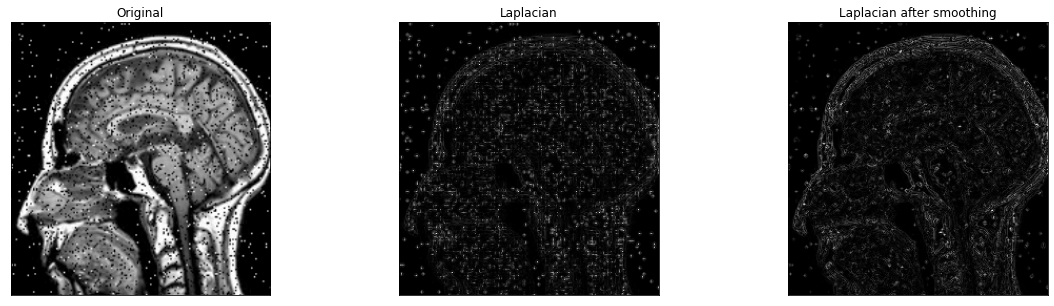

In [131]:
img = cv2.imread('fig/Notebook/mri.png',0)

getLaplacians(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


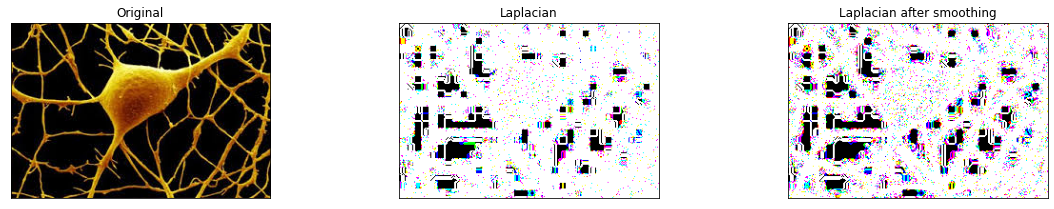

In [84]:
img = cv2.imread('fig/Notebook/purkinje.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

getLaplacians(img)

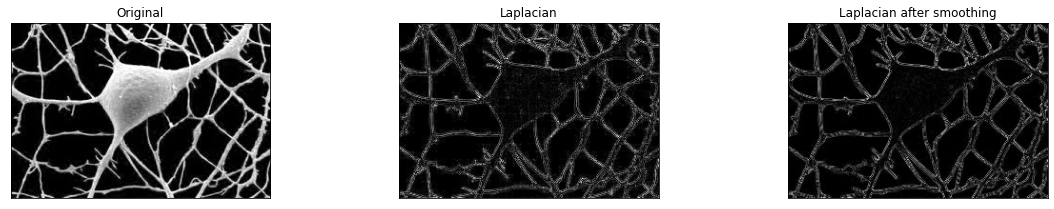

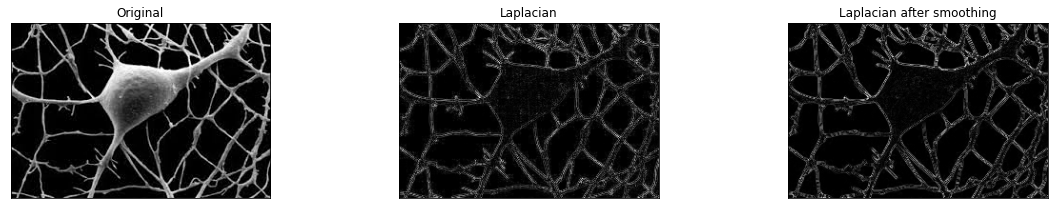

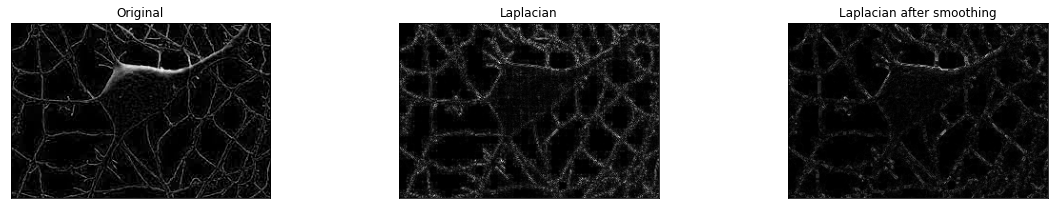

In [77]:
r,g,b = cv2.split(img)
chans = (r,g,b)

for chan in chans:
    getLaplacians(chan)

<h1>Función: <span style="color:blue">cv2.Canny</span></h1>  

In [117]:
#Canny
#https://en.m.wikipedia.org/wiki/Canny_edge_detector
#http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

def getCanny(img):
    edges = cv2.Canny(img,80,200)

    #Visualización
    plt.figure(1)
    plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

    plt.show()
    
    return edges

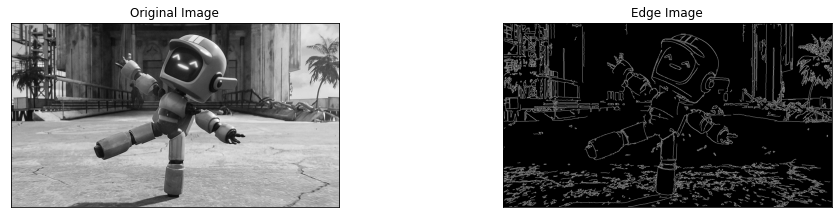

In [122]:
img = cv2.imread('fig/Notebook/kvrc.jpg',0)
edges = getCanny(img)

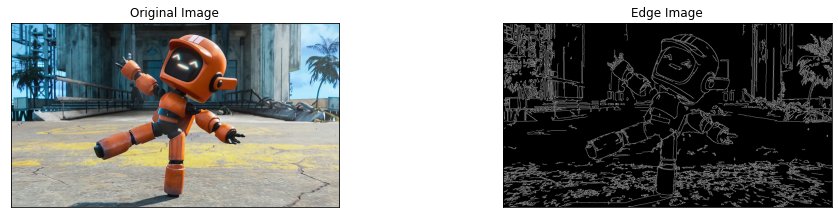

In [123]:
img = cv2.imread('fig/Notebook/kvrc.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

edges2 = getCanny(img)

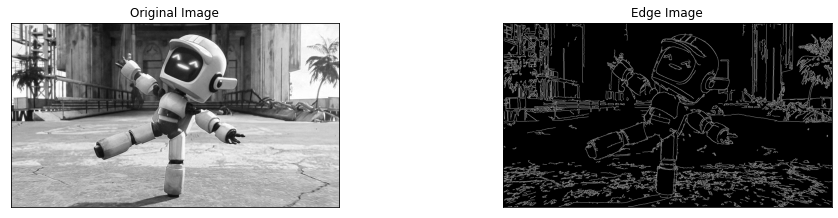

In [124]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(img_hsv)
edges3 = getCanny(v)

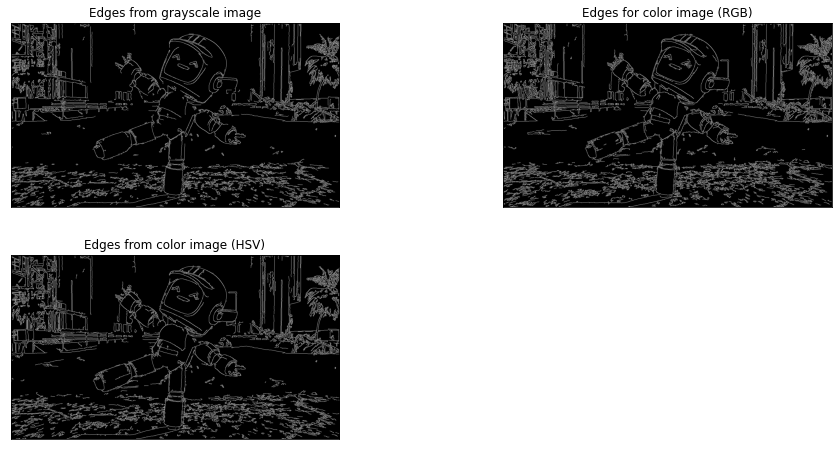

In [125]:
plt.figure(1)
plt.subplots_adjust(top=1.75,bottom=0.3,left=0.10,right=2,hspace=0.25,wspace=0.5)

plt.subplot(221),plt.imshow(edges,cmap='gray')
plt.title('Edges from grayscale image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(edges2,cmap = 'gray')
plt.title('Edges for color image (RGB)'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges3,cmap = 'gray')
plt.title('Edges from color image (HSV)'), plt.xticks([]), plt.yticks([])

plt.show()